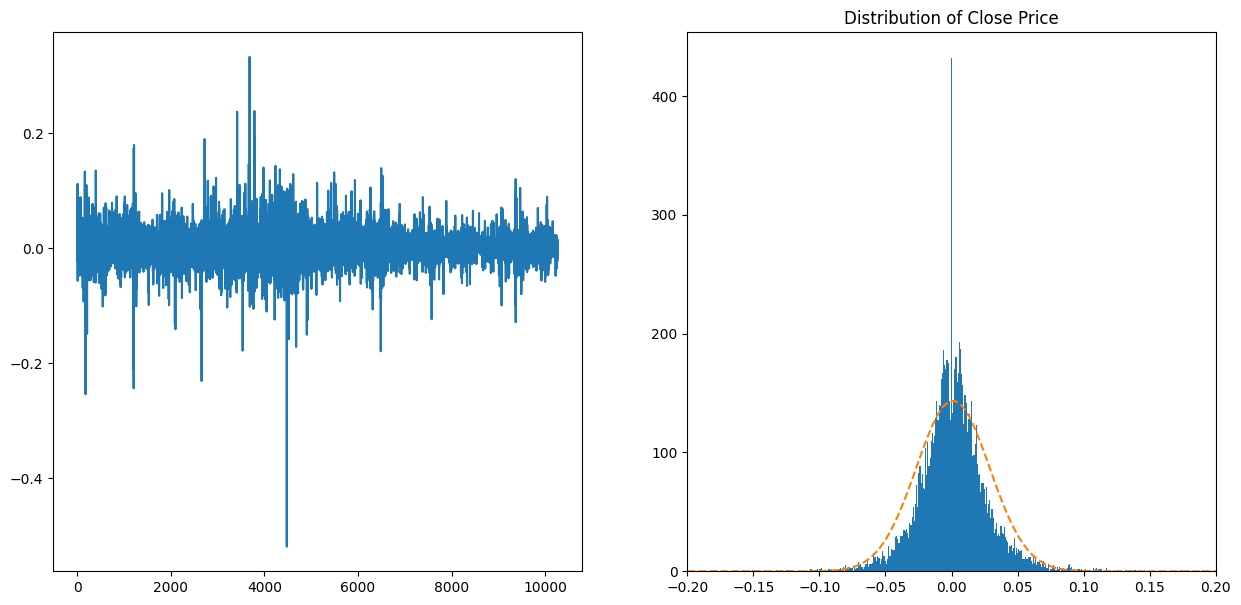

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the CSV file
data = pd.read_csv('../dataset/AAPL_diff_pct.csv')

# Plot the close pr
plt.figure(figsize=(15, 7))
axes1 = plt.subplot(1, 2, 1)
axes1.plot(data['Close'])

# plot the distribution of the close price
axes2 = plt.subplot(1, 2, 2)
axes2.hist(data['Close'], bins=1000)
# set min and max for x-axis
axes2.set_xlim([-.2, .2])

# draw gaussian distribution
mean = data['Close'].mean()
std = data['Close'].std()
x = np.linspace(-.2, .2, 100)
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(- (x - mean)**2 / (2 * std**2)) * 10
axes2.plot(x, y, '--')
axes2.set_title('Distribution of Close Price')
plt.show()

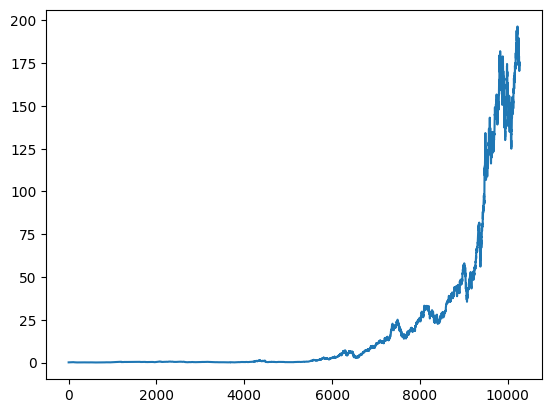

In [9]:

plt.plot(data['Close'])
plt.show()

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from ..utils.metrics import metric

model_ids = {
    # "AAPL": "PatchTST_AAPL_336_96",
    # "MSFT": "PatchTST_MSFT_336_96",
    # "JPM": "PatchTST_JPM_336_96",
    # "BAC": "PatchTST_BAC_336_96",
    # "KO": "PatchTST_KO_336_96",
    # "PG": "PatchTST_PG_336_96",
    # "JNJ": "PatchTST_JNJ_336_96",
    # "PFE": "PatchTST_PFE_336_96",
    # "XOM": "PatchTST_XOM_336_96",
    # "CVX": "PatchTST_CVX_336_96",
    # "PatchTST": "PatchTST_AAPL_336_96",
    # "Autoformer": "Autoformer_AAPL_336_96",
    # "Transformer": "Transformer_AAPL_336_96",
    # "DLinear": "DLinear_AAPL_336_96",
    # "PatchTST": "PatchTST_AAPL_pct_336_96",
    # "Autoformer": "Autoformer_AAPL_pct_336_96",
    # "Transformer": "Transformer_AAPL_pct_336_96",
    # "DLinear": "DLinear_AAPL_pct_336_96",
    "AAPL": "PatchTST_AAPL_with_sentiment_336_96",
    "AAPL_S": "PatchTST_AAPL_without_sentiment_336_96",
}


def getPath(model_id):
    return "../results/" + model_id + "/data/"


df = pd.DataFrame(columns=['model_name', 'model_id', 'mae', 'mse',
                  'rmse', 'mape', 'mspe', 'rse'])

for i, (model_name, model_id) in enumerate(model_ids.items()):
    data_path = getPath(model_id)
    metrics = np.load(data_path + "metrics.npy")
    preds = np.load(data_path + "pred.npy")
    print(preds[:,:,-1].shape)
    quit()

    model_data = pd.DataFrame({
        'model_name': model_name,
        'model_id': model_id,
        'mae': metrics[0],
        'mse': metrics[1],
        'rmse': metrics[2],
        'mape': metrics[3],
        'mspe': metrics[4],
        'rse': metrics[5]
    }, index=[i])

    df = pd.concat([df, model_data], ignore_index=True)

df.to_csv('model_comparison_pct.csv', index=False)

fig = plt.figure(figsize=(14, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
width = 0.8
r = np.arange(2)
fig.suptitle('Model Comparison', fontsize=16)

for i, column in enumerate(df.columns):
    if column == 'model_name' or column == 'model_id':
        continue
    index = i - 2

    colors = []
    for value in df[column]:
        if value == df[column].min():
            colors.append('orange')
        else:
            colors.append('royalblue')

    axes = plt.subplot(2, 3, index + 1)
    axes.bar(df['model_name'], df[column], width=width, color=colors)
    axes.set_title(column.upper())

ImportError: attempted relative import with no known parent package

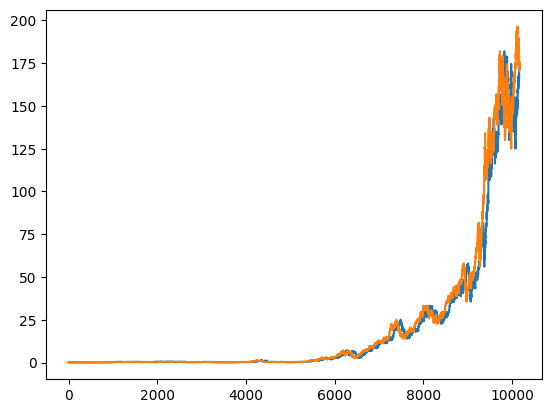

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../dataset/AAPL.csv')

data["Open"] = data["Close"].shift(-96)
data = data.drop(data.tail(96).index)

plt.plot(data['Close'])
plt.plot(data['Open'])


# # Save to csv
data.to_csv('../dataset/AAPL_Future.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../dataset/AAPL.csv')


plt.figure(figsize=(10, 30))

for i, column in enumerate(data.columns):
    if column == 'Timestamp':
        continue
    plt.subplot(len(data.columns) - 1, 1, i)
    plt.plot(data[column])

plt.show()

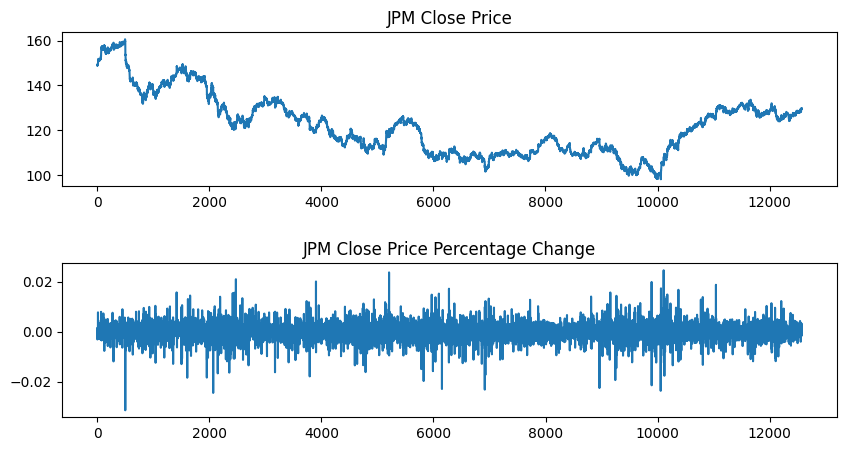

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

symbol = "JPM"

data1 = pd.read_csv('../dataset/' + symbol + '.csv')
data2 = pd.read_csv('../dataset/' + symbol + '_pct.csv')

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(data1["Close"])
plt.title(symbol + " Close Price")

plt.subplot(2, 1, 2)
plt.plot(data2["Close"])
plt.title(symbol + " Close Price Percentage Change")

plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots

plt.show()

/home/clo3olb/trader_ai/trader_ai/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


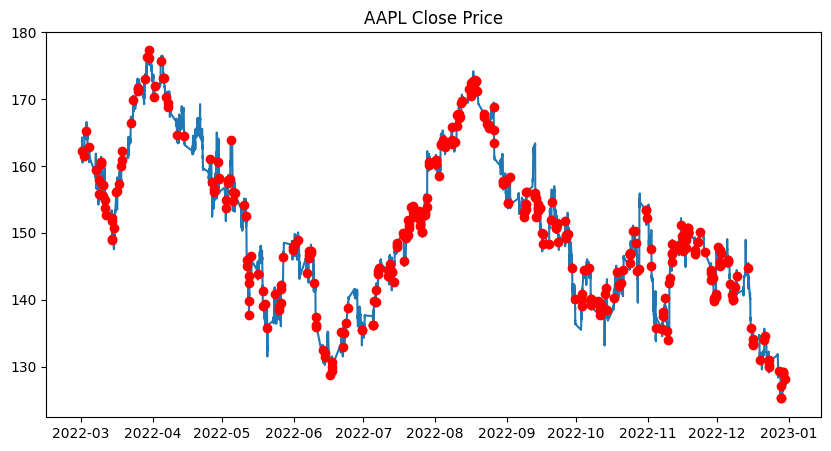